<div style="width: 60%; clear: both;">
    <div style="float: left; width: 40%;">
       <img src="https://universidadeuropea.com/resources/media/images/universidad-europea-logo_poc9mEM.original.png", align="left">
    </div>
</div>
<div style="float: right; width: 60%;">
<p style="margin-left:0; margin-right:0; text-align:right"><span style="font-size:22px"><strong>MASTER UNIVERSITARIO EN ANALISIS DE DATOS MASIVOS (BIG DATA)</strong></span></p>
<p style="margin-left:0; margin-right:0; text-align:right"><span style="font-size:22px"><strong>Trabajo Final de Máster</strong></span></p>
<p style="margin-left:0; margin-right:0; text-align:right"><span style="font-size:22px">CLASIFICACIÓN DE NOTICIAS MEDIANTE EL USO DE MODELOS BASADOS EN TRANSFORMERS</span></p>
<p style="margin-left:0; margin-right:0; text-align:right">
  <span style="font-size:18px; display:inline-block;">GERARD MART&Iacute;NEZ CA&Ntilde;ETE</span>
  <a href="https://www.linkedin.com/in/gmcanete/" target="_blank" style="display:inline-block;">
    <img src="https://cdn-icons-png.flaticon.com/512/174/174857.png" alt="Logo de LinkedIn" width="20" style="vertical-align: middle;">
  </a>
</p>
</div>

# Limpieza del dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from IPython.display import display, HTML
display(HTML("<style>div.output_scroll { height: unset; max-height: unset; }</style>"))

In [2]:
file_path = '/Users/gerardmartinez/tfm/Datasets/full_dataset.csv'
df = pd.read_csv(file_path)
df.shape

(3317242, 12)

Se aplican los siguientes filtros: <ul>
<li>Se descartan las noticias de los sites que utilizan otras lenguas a parte del español, porque el idioma objetivo del modelo es el español.</li>
<li>Se mantienen únicamente 9 categorías de noticias</li>
<li>Se eliminan las noticias adaptadas a versión móvil (son noticias duplicadas pero conciertos cambios) y las que están en valenciano (subdominio val.)</li>
<li>Se eliminan aquellas con menos de 80 y más de 800 palabras</li>
<li>Se eliminan duplicados</li>
<li>Se renombran las columnas conforme a las necesidades del dataset de entrenamiento de un modelo basado en Transformers: {'text':'label'}</li>
<li>Se escogen únicamente 1900 elementos para cada categoría</li>
</ul>

In [3]:
df1 = df[~df['site'].isin(['regio7', 'diaridegirona', 'levante-emv', 'mallorcazeitung', 'farodevigo', 'laopinioncoruna'])]
keep_category = ["vida y estilo", "cultura", "politica",
                 "economia", "deportes", "gastronomia",
                 "ciencia", "tecnologia", "esquelas"]
df1 = df1[df1['url_subsection'].isin(keep_category)]
df1 = df1[~df1['url'].str.contains('val.|amp')]
df1['length']= df1['body'].apply(lambda x: len(str(x).split()))
df1 = df1[(df1['length'] <=800) & (df1['length'] >=80)]
df1 = df1.drop_duplicates(subset=['body'])
df2 = df1[['body', 'url_subsection']].copy()
df2.rename(columns={'body': 'text', 'url_subsection': 'label'}, inplace=True)
df2 = df2.groupby('label').apply(lambda x: x.sample(n=1900, replace=True, random_state=1) if len(x) >= 1900 else x).reset_index(drop=True)
df2['label'].value_counts()

label
ciencia          1900
cultura          1900
deportes         1900
economia         1900
esquelas         1900
gastronomia      1900
politica         1900
tecnologia       1900
vida y estilo    1900
Name: count, dtype: int64

Se genera un histograma para ver la longitud del texto

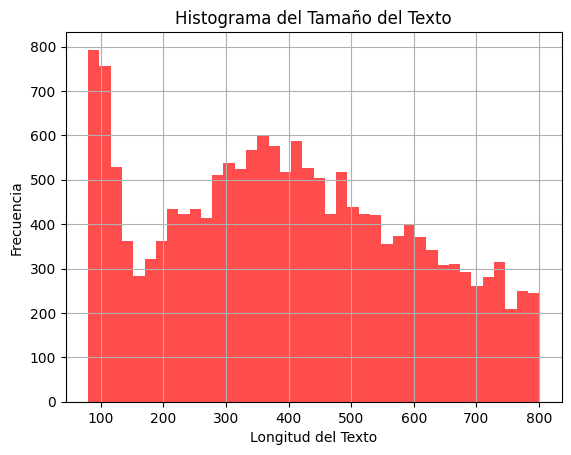

In [4]:
df2['length']= df2['text'].apply(lambda x: len(str(x).split()))
plt.hist(df2['length'], bins=40, color='red', alpha=0.7)
plt.xlabel('Longitud del Texto')
plt.ylabel('Frecuencia')
plt.title('Histograma del Tamaño del Texto')
plt.grid(True)
plt.show()

Se divide el dataset en dos:
<ul>
<li><b>Train</b>: 1700 elementos</li>
<li><b>Test</b>: 200 elementos</li></ul>

In [5]:
train_data = []
test_data = []
categorias = df2['label'].unique()
for categoria in categorias:
    subset = df2[df2['label'] == categoria]
    train_subset, test_subset = train_test_split(subset, test_size=200, random_state=42)
    train_data.append(train_subset)
    test_data.append(test_subset)

In [6]:
train_df = pd.concat(train_data, ignore_index=True)
test_df = pd.concat(test_data, ignore_index=True)

In [7]:
train_df['label'].value_counts()

label
ciencia          1700
cultura          1700
deportes         1700
economia         1700
esquelas         1700
gastronomia      1700
politica         1700
tecnologia       1700
vida y estilo    1700
Name: count, dtype: int64

In [8]:
test_df['label'].value_counts()

label
ciencia          200
cultura          200
deportes         200
economia         200
esquelas         200
gastronomia      200
politica         200
tecnologia       200
vida y estilo    200
Name: count, dtype: int64

In [ ]:
train_df.to_csv('9cat_train_dataset.csv', index=False)
test_df.to_csv('9cat_test_dataset.csv', index=False)

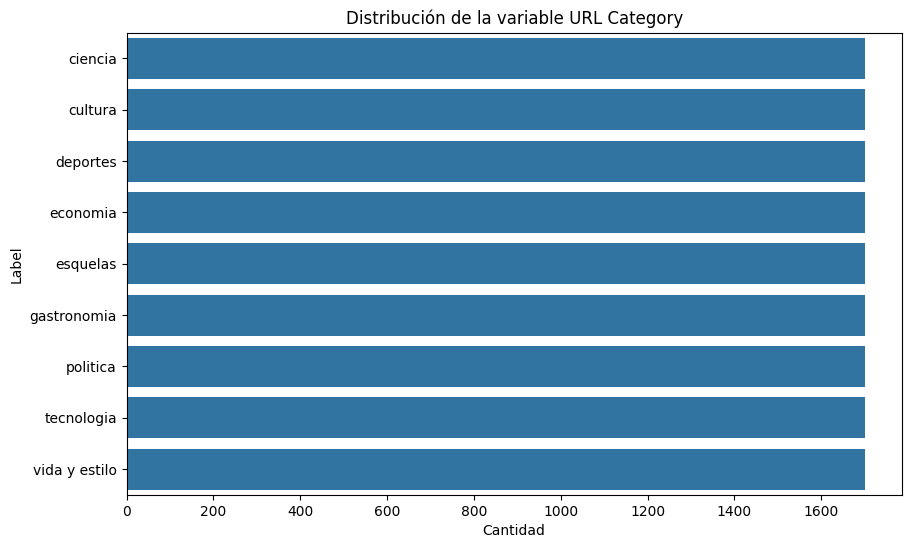

9

In [9]:
unique_url_category = train_df['label'].nunique()
plt.figure(figsize=(10, 6))
sns.countplot(y='label', data=train_df, order = train_df['label'].value_counts().index)
plt.title('Distribución de la variable URL Category')
plt.xlabel('Cantidad')
plt.ylabel('Label')
plt.show()
unique_url_category

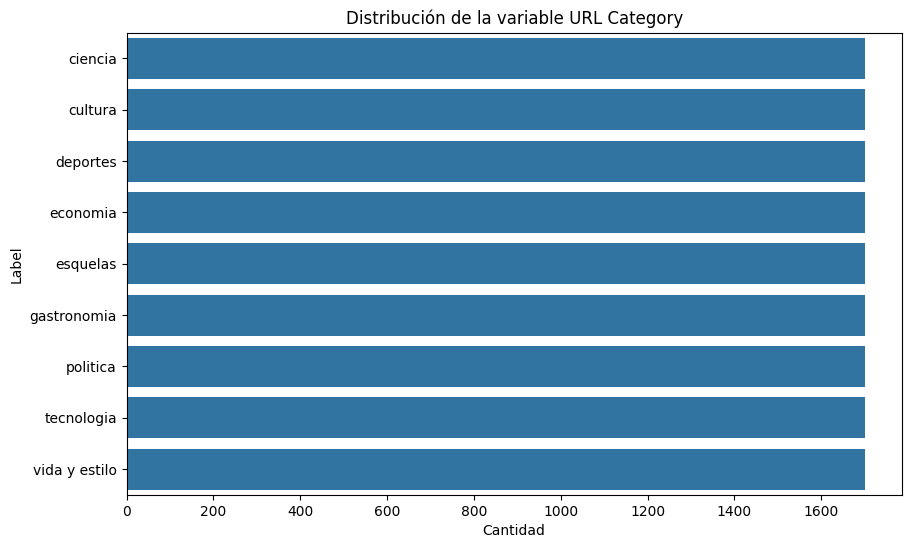

9

In [10]:

unique_url_category = test_df['label'].nunique()
plt.figure(figsize=(10, 6))
sns.countplot(y='label', data=train_df, order = test_df['label'].value_counts().index)
plt.title('Distribución de la variable URL Category')
plt.xlabel('Cantidad')
plt.ylabel('Label')
plt.show()
unique_url_category